In [ ]:
pip install fancyimpute

In [53]:
import sys

import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer
from fancyimpute import KNN 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Heart Disease.csv to Heart Disease.csv


In [3]:
ldf = pd.read_csv("Heart Disease.csv")

In [4]:
ldf

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [8]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [26]:
def convertColsCategorical(data, cols):
  data[cols] = data[cols].astype('category')

In [27]:
convertColsCategorical(ldf, ['education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes', 'male'])

In [33]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4238 non-null   category
 1   age              4238 non-null   int64   
 2   education        4133 non-null   category
 3   currentSmoker    4238 non-null   category
 4   cigsPerDay       4209 non-null   float64 
 5   BPMeds           4185 non-null   category
 6   prevalentStroke  4238 non-null   category
 7   prevalentHyp     4238 non-null   category
 8   diabetes         4238 non-null   category
 9   totChol          4188 non-null   float64 
 10  sysBP            4238 non-null   float64 
 11  diaBP            4238 non-null   float64 
 12  BMI              4219 non-null   float64 
 13  heartRate        4237 non-null   float64 
 14  glucose          3850 non-null   float64 
 15  TenYearCHD       4238 non-null   int64   
dtypes: category(7), float64(7), int64(2)
memor

In [29]:
def getCategoricalCols(data):
  return data.select_dtypes(include=["category"]).columns

def getObjectCols(data):
  return data.select_dtypes(include=["object"]).columns

def geNonNumericCols(data):
  return data.select_dtypes(include=["category"]).columns

def getNumeric(data):
  return data.select_dtypes(include=["number"]).columns

In [34]:
geNonNumericCols(ldf)

Index(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes'],
      dtype='object')

In [ ]:
def replaceNullByMean(data):
  try:
    return data.fillna(data.mean())
  except Exception as exp:
    print("Oops!", sys.exc_info()[0], "occurred.")

In [43]:
def imputeByMean(data, nonNumeric):
  try:
    imputedMean = SimpleImputer(strategy='mean')
    dataNumeric = data.drop(nonNumeric, axis=1)
    imputedMean.fit(dataNumeric)
    imputedData = imputedMean.transform(dataNumeric)

    d1 = pd.DataFrame(imputedData)
    d1.columns = dataNumeric.columns
    finalImputedData = pd.concat([d1, data.loc[:,nonNumeric]], axis=1)
    ## imputedData.columns = data.columns
    return finalImputedData
  except Exception as exp:
    print("Oops!", sys.exc_info()[0], "occurred.")

In [45]:
imputeByMean(ldf, geNonNumericCols(ldf))

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0,1,4.0,0,0.0,0,0,0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0,0,2.0,0,0.0,0,0,0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0,1,1.0,1,0.0,0,0,0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0,0,3.0,1,0.0,0,1,0
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0,0,3.0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50.0,1.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0,1,1.0,1,0.0,0,1,0
4234,51.0,43.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0,1,3.0,1,0.0,0,0,0
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0,0,2.0,1,NaN,0,0,0
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0,0,1.0,1,0.0,0,0,0


In [46]:
def imputeByMedian(data, nonNumeric):
  try:
    imputedMedian = SimpleImputer(strategy='median')
    dataNumeric = data.drop(nonNumeric, axis=1)
    imputedMedian.fit(dataNumeric)
    imputedData = imputedMedian.transform(dataNumeric)

    d1 = pd.DataFrame(imputedData)
    d1.columns = dataNumeric.columns
    finalImputedData = pd.concat([d1, data.loc[:,nonNumeric]], axis=1)
    ## imputedData.columns = data.columns
    return finalImputedData
  except Exception as exp:
    print("Oops!", sys.exc_info()[0], "occurred.")

In [47]:
imputeByMedian(ldf, geNonNumericCols(ldf))

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,1,4.0,0,0.0,0,0,0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,0,2.0,0,0.0,0,0,0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,1,1.0,1,0.0,0,0,0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,0,3.0,1,0.0,0,1,0
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,0,3.0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50.0,1.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0,1,1.0,1,0.0,0,1,0
4234,51.0,43.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0,1,3.0,1,0.0,0,0,0
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0,0,2.0,1,NaN,0,0,0
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,78.0,0.0,0,1.0,1,0.0,0,0,0


In [51]:
def imputeByKNN(data, numericCols):
  try:
    #dataNumeric = data.drop(nonNumeric, axis=1)
    # start the KNN training
    dataNumeric = data[numericCols]
    nonNumericCols = [col for col in data.columns if col not in numericCols]
    d2 = data[nonNumericCols]

    imputer = KNNImputer(n_neighbors=2)
    imputedDataKNN = imputer.fit_transform(dataNumeric.values)
    d1 = pd.DataFrame(imputedDataKNN)
    d1.columns = dataNumeric.columns
    imputedData = pd.concat([d1, d2], axis=1)
    ## imputedData.columns = data.columns
    return imputedData
  except Exception as exp:
    print("Oops!", sys.exc_info()[0], "occurred.")

In [52]:
imputeByKNN(ldf, getNumeric(ldf))

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,1,4.0,0,0.0,0,0,0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,0,2.0,0,0.0,0,0,0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,1,1.0,1,0.0,0,0,0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,0,3.0,1,0.0,0,1,0
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,0,3.0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50.0,1.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0,1,1.0,1,0.0,0,1,0
4234,51.0,43.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0,1,3.0,1,0.0,0,0,0
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0,0,2.0,1,NaN,0,0,0
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,79.5,0.0,0,1.0,1,0.0,0,0,0


In [56]:
def pandaPlot(data, numericCols, categoricalCols, response='TARGET_deathRate'):
        try:
            plt.close('all')
            x = data.plot(x=numericCols[0], y=numericCols[1], style='o')
            # data.plot(x=data[0], y=data[1], style='o')
            plt.title('Graph')
            plt.xlabel(numericCols[0])
            plt.ylabel(numericCols[1])

            plt.show()
            """
            for i in range((len(numericCols)-1)):
                data.plot.hexbin(x=response, y=numericCols[i+1], gridsize=25)
                plt.close()
            """
            scaler = MinMaxScaler()
            d2 = scaler.fit_transform(data[numericCols])
            scaledData = pd.DataFrame(d2, columns=data[numericCols].columns)
            # x = preprocessing.scale(data[numericCols])
            # scaledData = pd.DataFrame(x)
            # scaledData.columns = data[numericCols].columns
            plt.figure()
            scaledData.iloc[:, 0:4].plot.hist(alpha=0.5)

            plt.show()
            x = scaledData[numericCols[0:30]].plot.kde()
            x.figure.savefig('pandaKDE.png')
            scaledData[numericCols[0:2]].plot.area()

            pd.crosstab(data.binnedInc, data.PctWhiteBin).plot(kind='bar')
            plt.title('Frequency of White % Category for Income Group')
            plt.xlabel('Income')
            plt.ylabel('Frequency of White %')
        except Exception as exp:
            print("Oops!", sys.exc_info()[0], "occurred.")

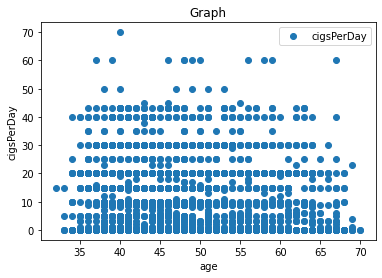

<Figure size 432x288 with 0 Axes>

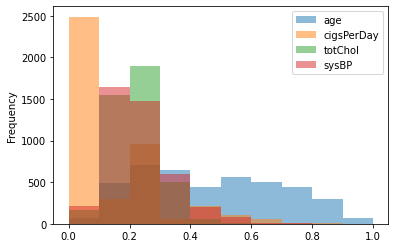

Oops! <class 'AttributeError'> occurred.


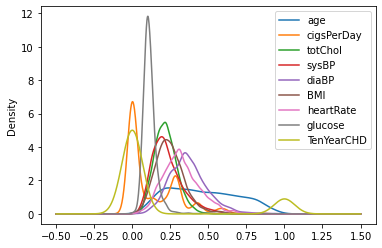

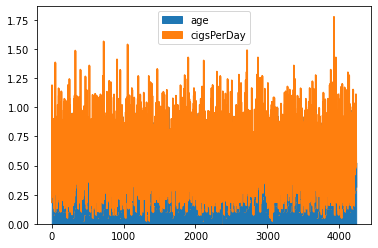

In [57]:
pandaPlot(ldf, getNumeric(ldf), geNonNumericCols(ldf), response='TARGET_deathRate')

In [74]:
def displot(data, numericCols):
  for i in numericCols:
    sns.distplot(data[i])
    plt.show()

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


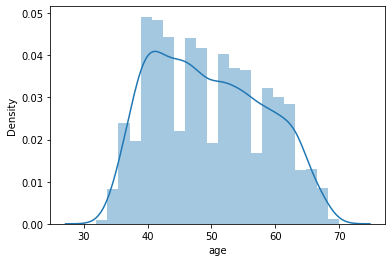

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


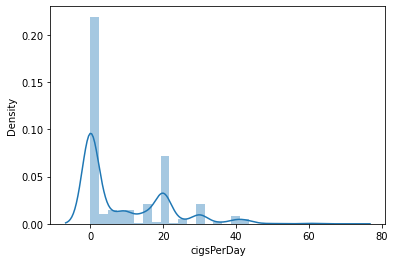

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


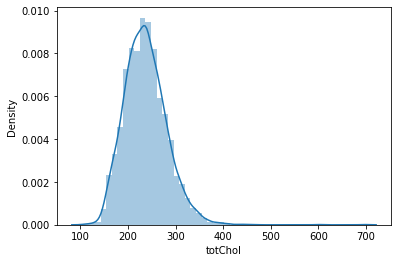

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


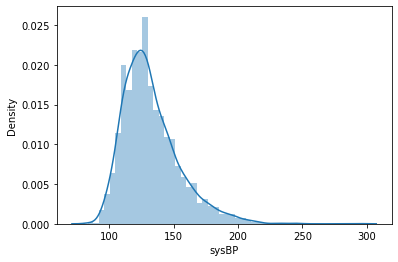

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


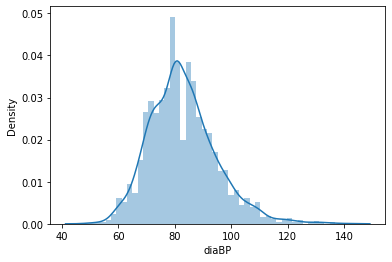

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


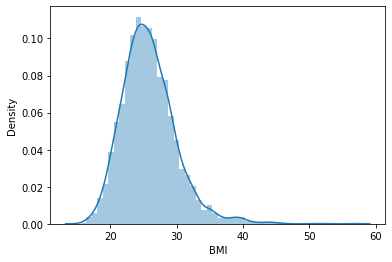

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


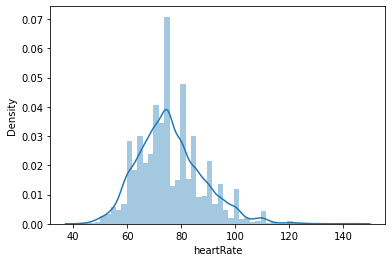

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


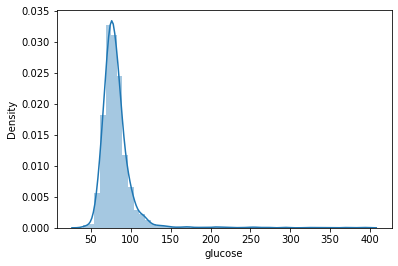

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


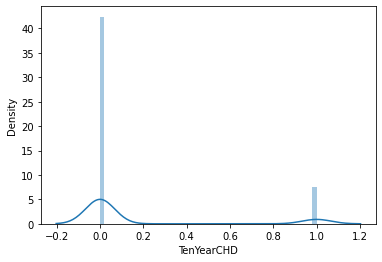

In [77]:
displot(ldf, getNumeric(ldf))

In [78]:
def pairplot(data):
  sns.pairplot(data)

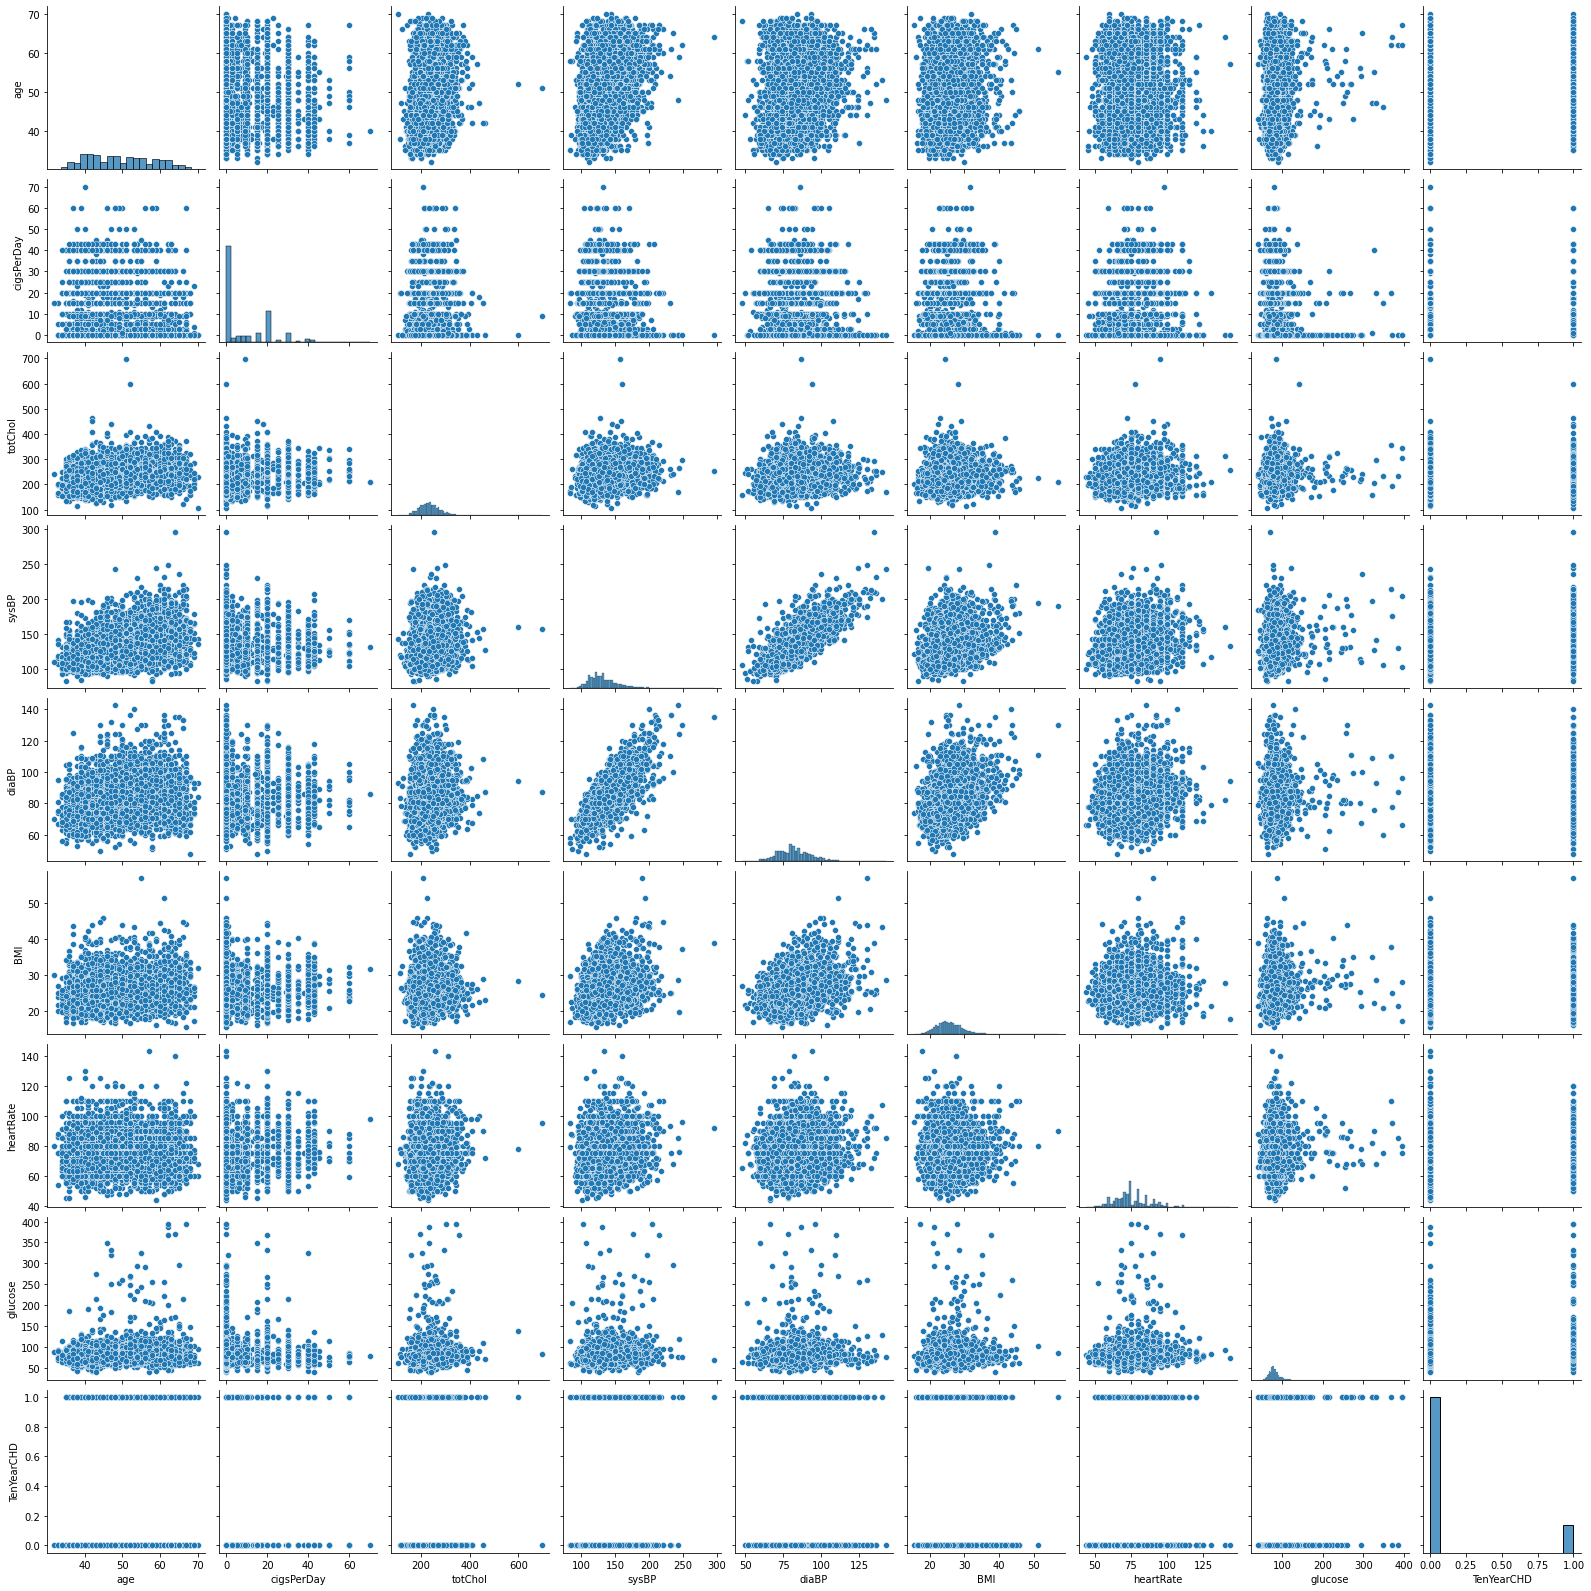

In [80]:
pairplot(ldf)

In [94]:
def rugplot(data, numericCols):
   for i in numericCols:
    plt.figure()
    sns.kdeplot(data=data[i])
    sns.rugplot(data=data[i])

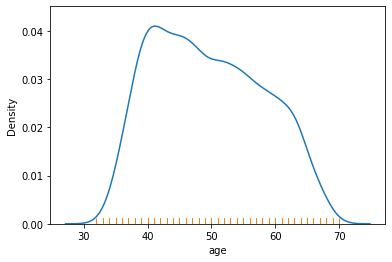

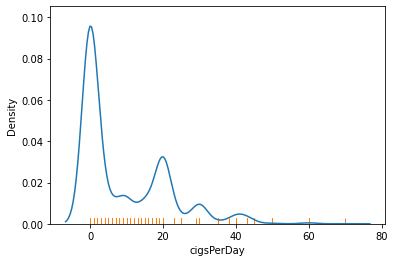

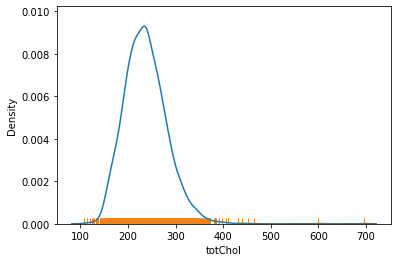

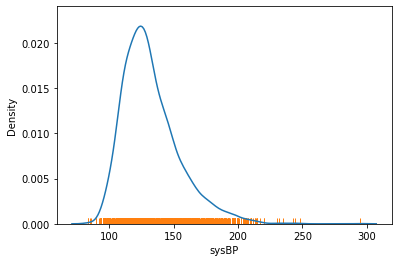

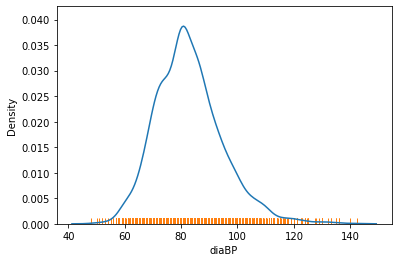

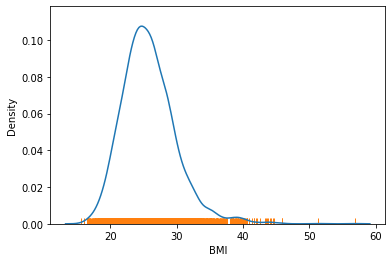

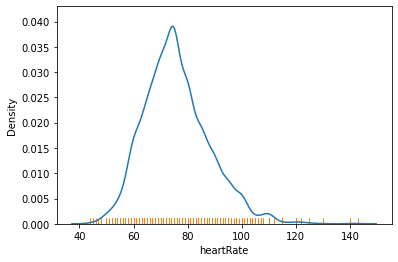

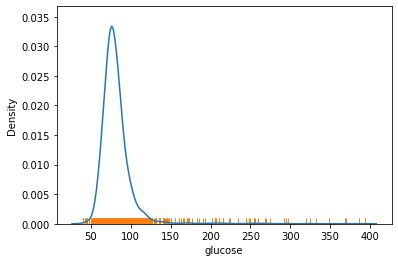

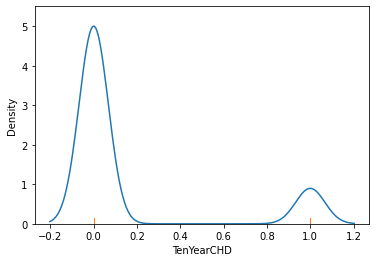

In [95]:
rugplot(ldf, getNumeric(ldf))

In [139]:
def lineplot(data, numericCols, response='TenYearCHD'):
  for i in range(len(numericCols)):
    for j in range(len(numericCols)-1):
      plt.figure()
      sns.lineplot(x=numericCols[i], y=numericCols[j+1], data=data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

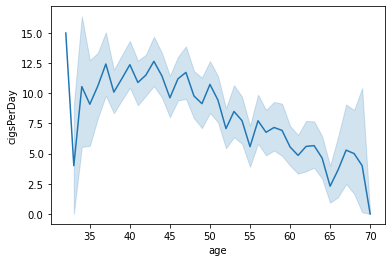

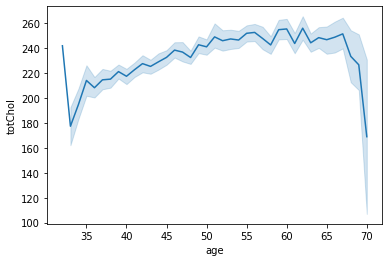

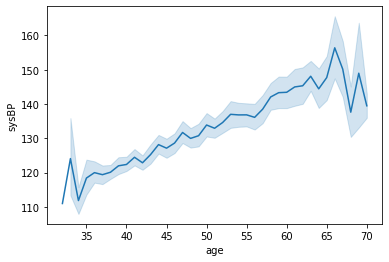

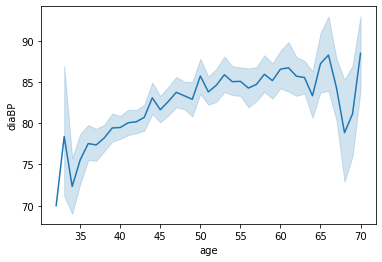

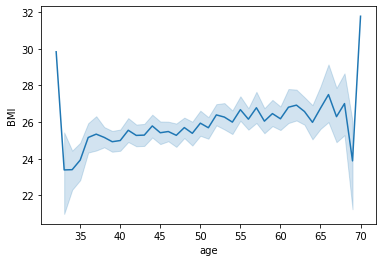

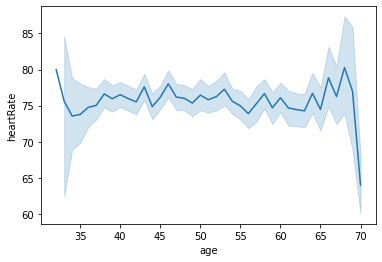

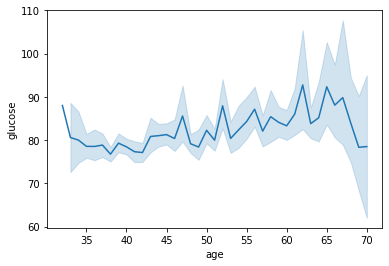

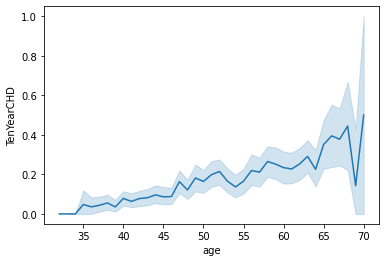

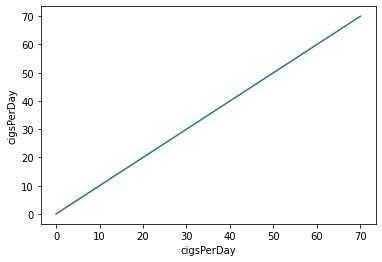

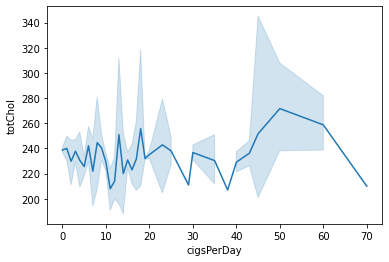

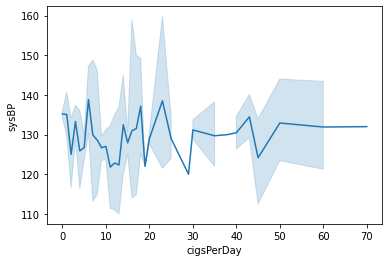

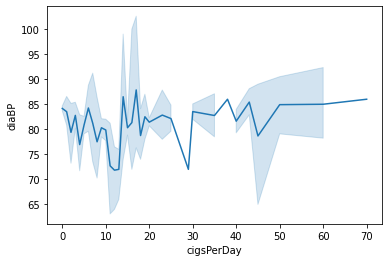

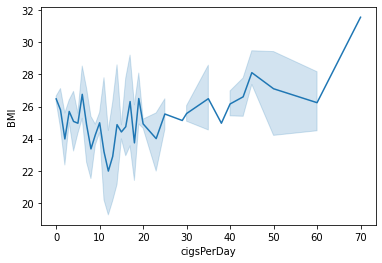

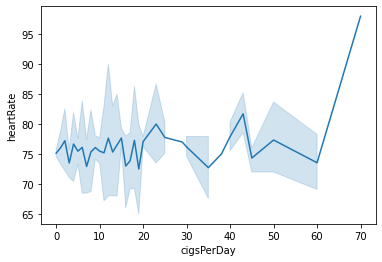

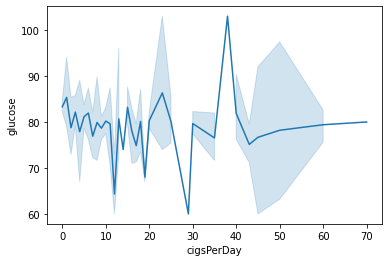

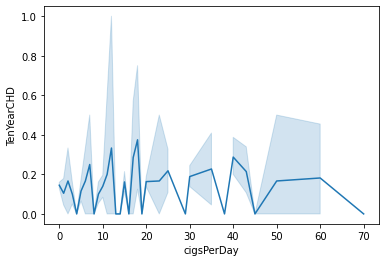

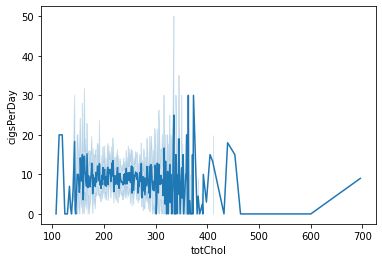

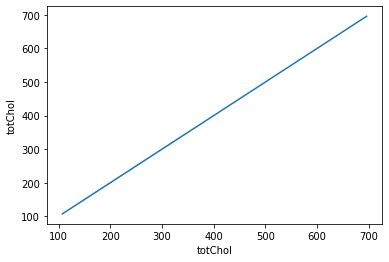

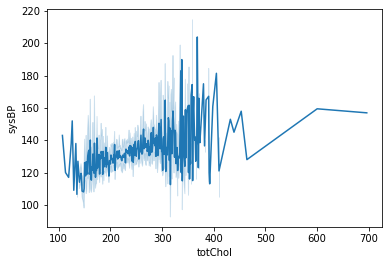

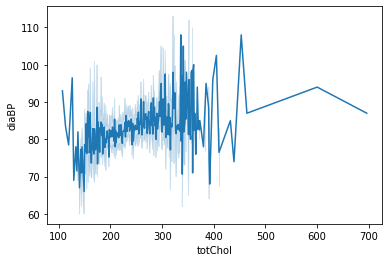

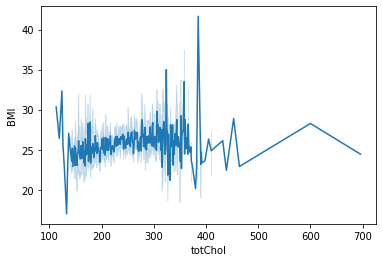

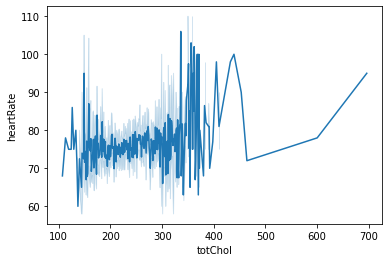

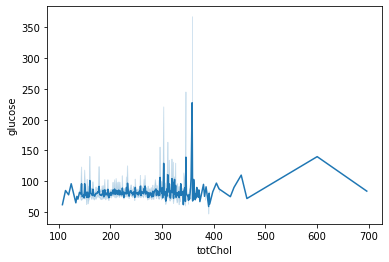

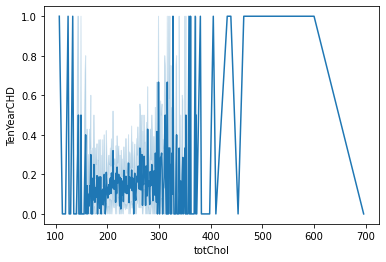

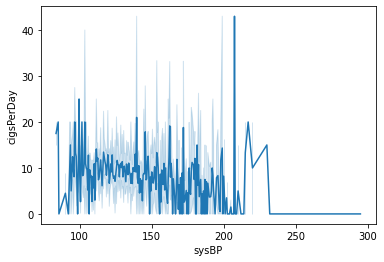

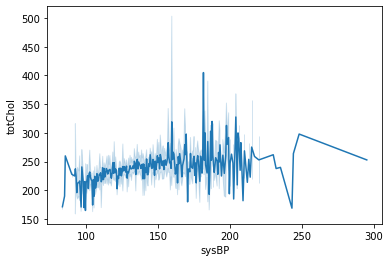

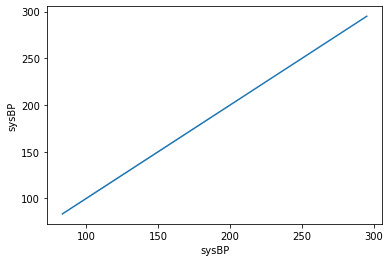

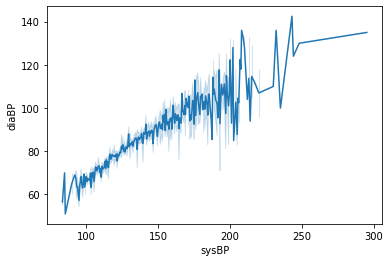

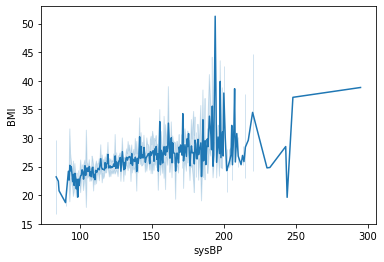

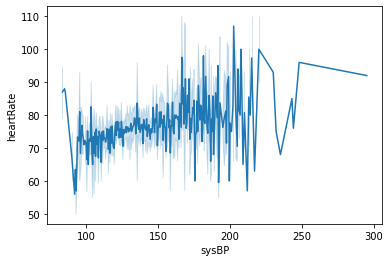

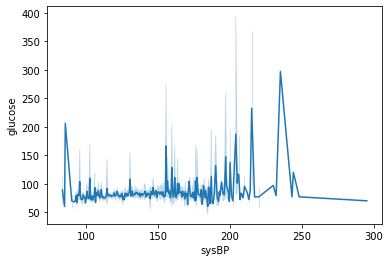

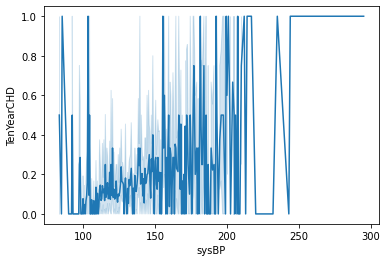

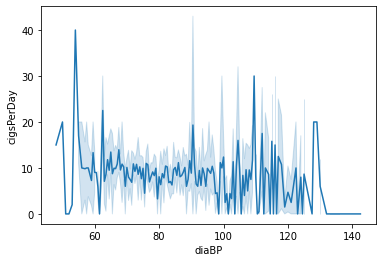

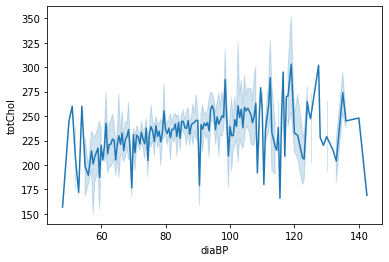

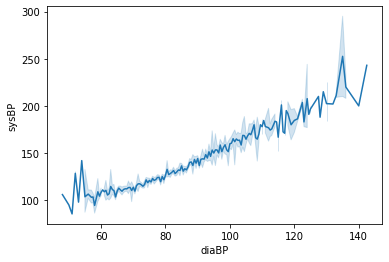

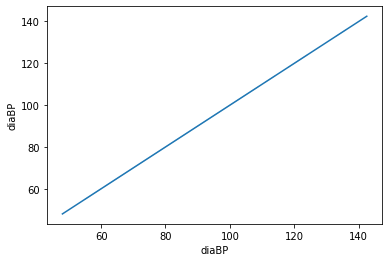

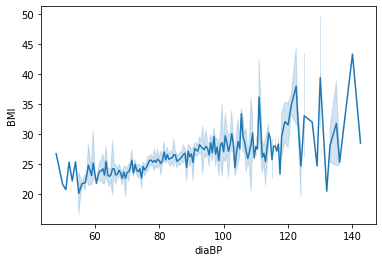

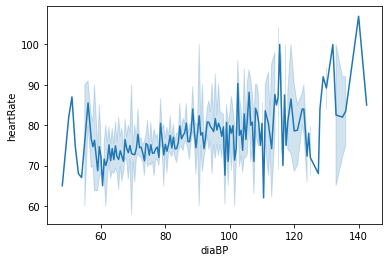

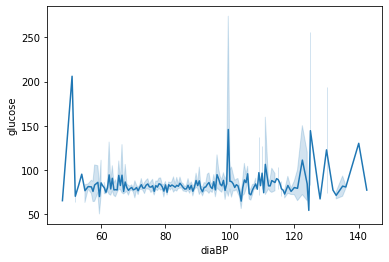

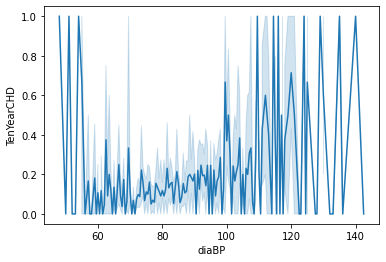

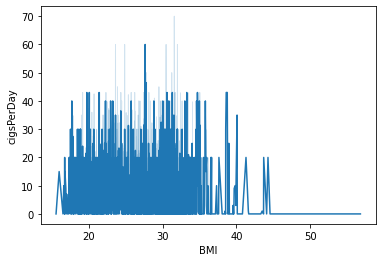

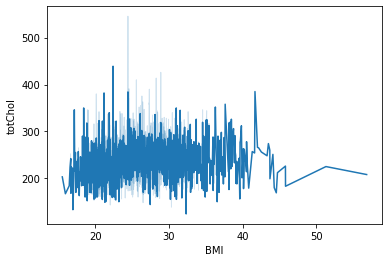

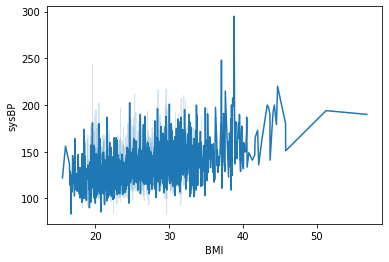

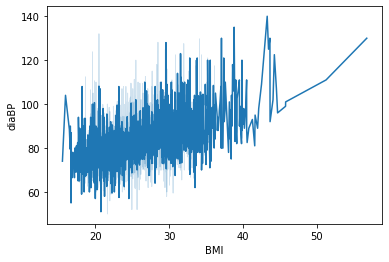

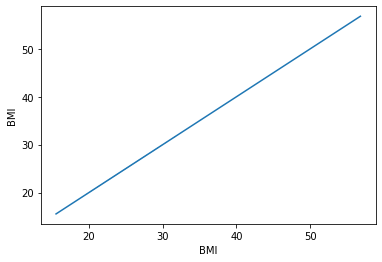

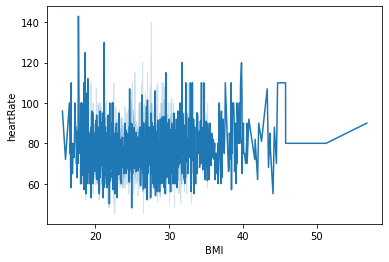

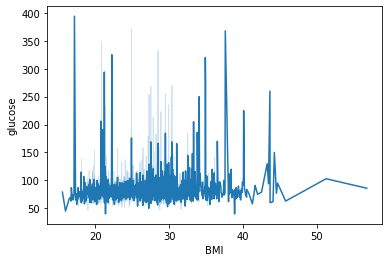

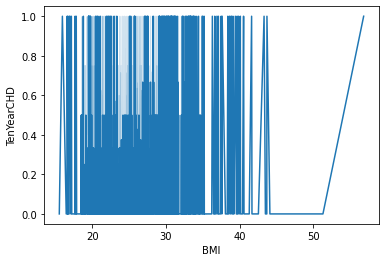

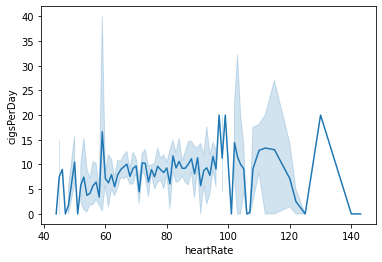

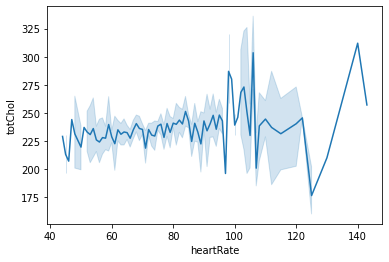

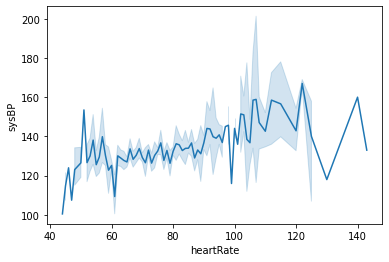

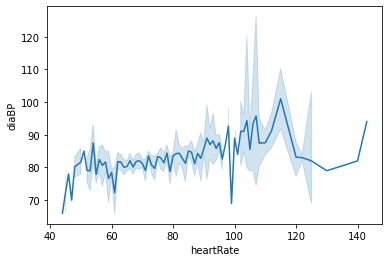

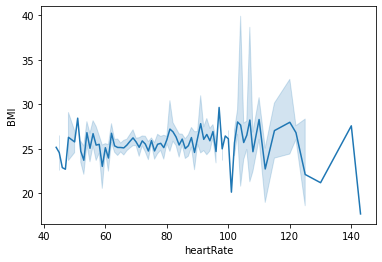

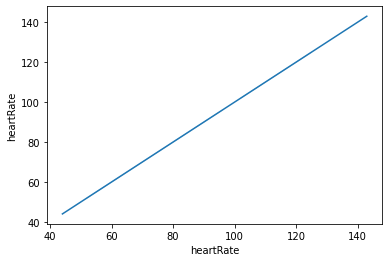

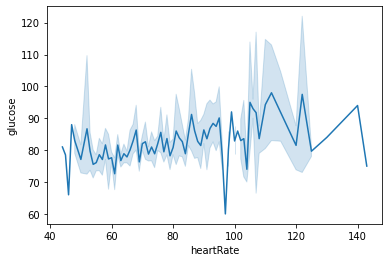

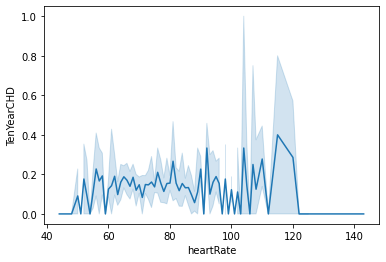

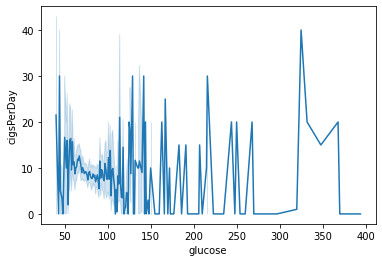

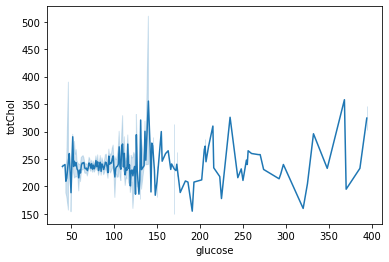

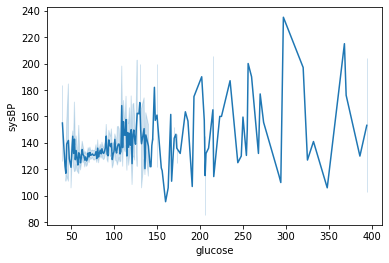

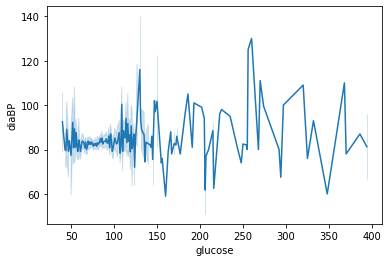

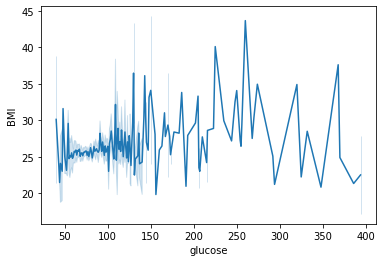

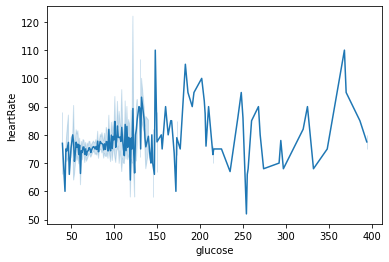

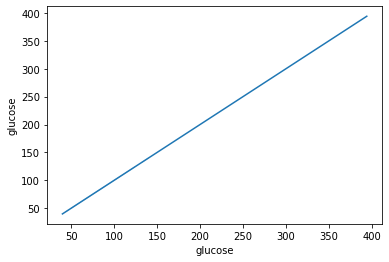

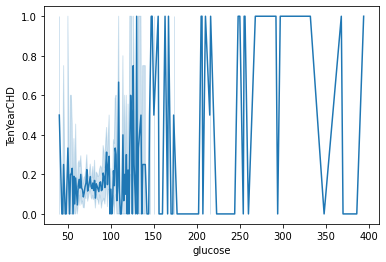

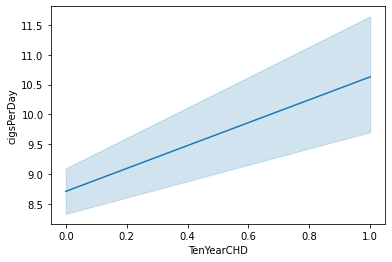

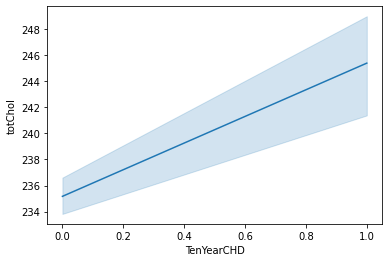

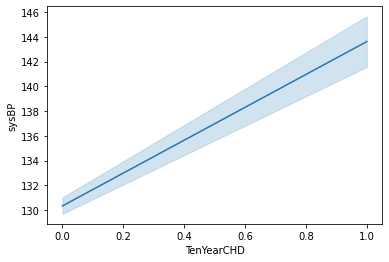

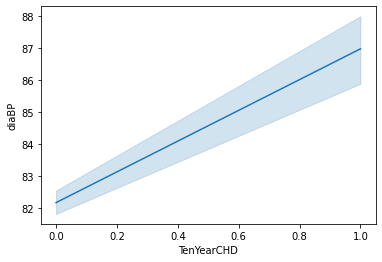

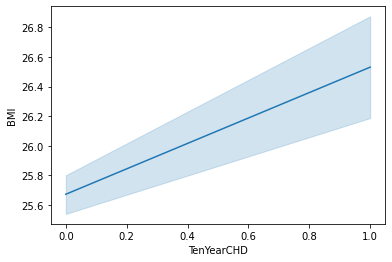

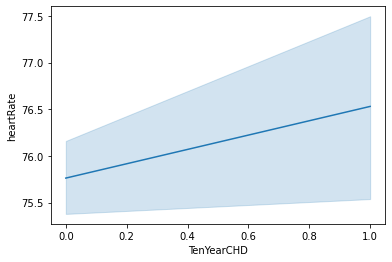

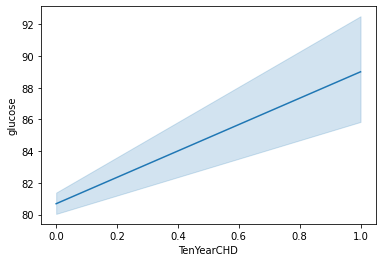

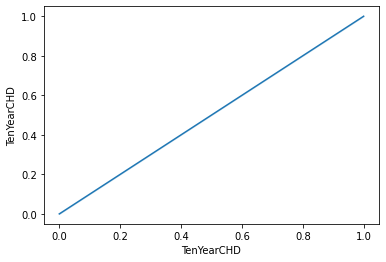

In [140]:
lineplot(ldf, getNumeric(ldf))